# Uber Rider Data Case Study

##  Project overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later. 

## Dataset description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY­MM­DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY­MM­DD’ 
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

In [98]:
df = pd.read_csv('data/raw_data.csv')

In [99]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


# Explore data

### Numeric variables

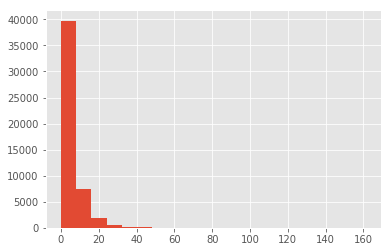

In [100]:
df['avg_dist'].hist(bins = 20)

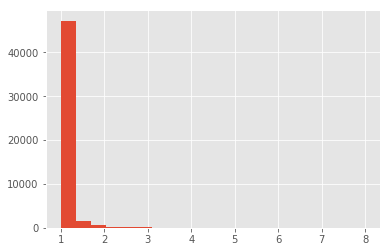

In [101]:
df['avg_surge'].hist(bins = 20)

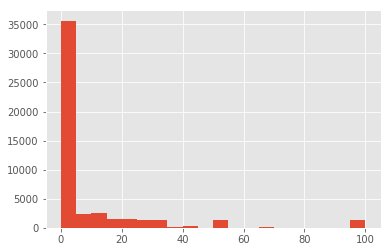

In [102]:
df['surge_pct'].hist(bins = 20)

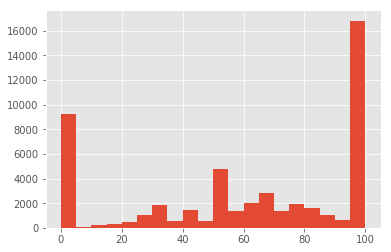

In [103]:
df['weekday_pct'].hist(bins = 20)

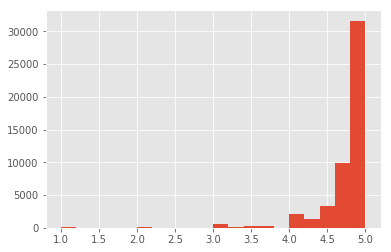

In [104]:
df['avg_rating_by_driver'].hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E29868DBA8>,
      dtype=object)

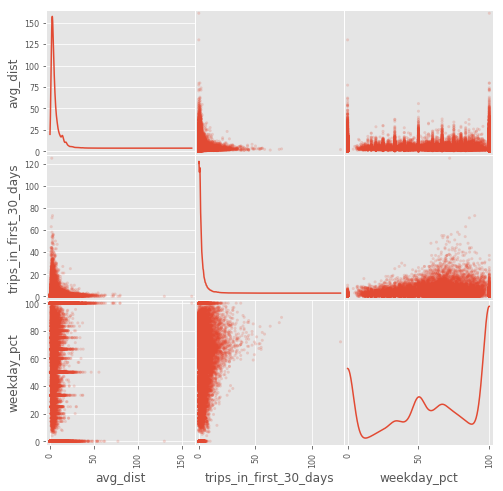

In [105]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')

### Categorical variables

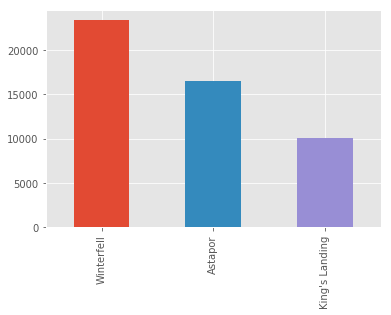

In [106]:
df['city'].value_counts().plot.bar()

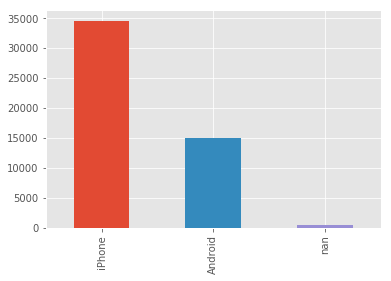

In [107]:
df['phone'].value_counts(dropna = False).plot.bar()

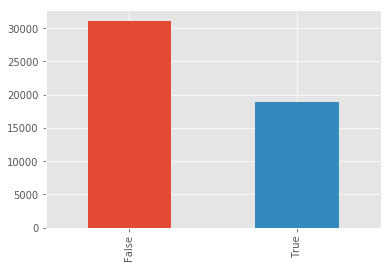

In [108]:
df['luxury_car_user'].value_counts(dropna = False).plot.bar()

# Clean data - dealing with missing values

In [109]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [110]:
df_fillna = df.copy()

In [152]:
df_fillna['phone'] = df['phone'].fillna('no_phone')

In [153]:
df_fillna['phone'].value_counts()

iPhone      34582
Android     15022
no_phone      396
Name: phone, dtype: int64

In [113]:
df_fillna['avg_rating_by_driver'] = df_fillna['avg_rating_by_driver'].fillna(df_fillna['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df_fillna['avg_rating_of_driver'].fillna(df_fillna['avg_rating_of_driver'].median())

In [115]:
df_fillna.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
luxury_car_user           0
weekday_pct               0
dtype: int64

In [116]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [117]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [118]:
df = df_fillna

# Trandform data

### Time-series variables

In [119]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [120]:
df['signup_date'].min(), df['signup_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [121]:
df['last_trip_date'].min(), df['last_trip_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [122]:
df_timestamp = df[['signup_date', 'last_trip_date']].copy()
df_timestamp['count'] = 1

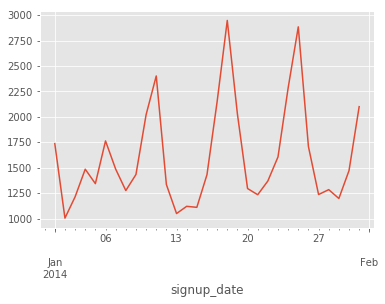

In [123]:
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample("1D").sum().plot()

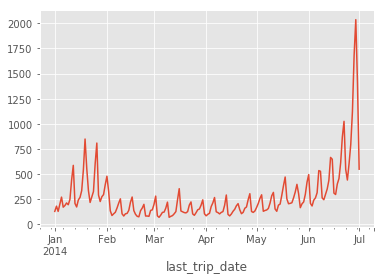

In [124]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

### Convert categorical variables

Categorical variables:
- city
- phone
- luxury_car_user

In [125]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [126]:
col_category = ['city', 'phone']

In [127]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [128]:
df_dummies.tail(2)

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
49998,1,0,0,0,1,0
49999,1,0,0,1,0,0


In [129]:
df = df.join(df_dummies)

In [132]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,0,100.0,0,1,0,0,1,0
49996,0.00,4.0,4.9,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,0,0.0,1,0,0,0,1,0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,1,100.0,0,0,1,1,0,0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,0,100.0,1,0,0,0,1,0
49999,3.49,5.0,4.9,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,0,0.0,1,0,0,1,0,0


In [133]:
df.shape

(50000, 18)

# Define a label / target

Define churn: users did not take a trip during last 30 days

In [ ]:
from datetime import datetime, timedelta

In [143]:
df['churn'] = (df.last_trip_date < df['last_trip_date'].max() - timedelta(days=30)) * 1
df['active'] = (df.last_trip_date >= df['last_trip_date'].max() - timedelta(days=30)) * 1

In [145]:
df['churn'].mean(), df['active'].mean()

(0.62392, 0.37608)

In [146]:
df['last_trip_date'].max() - timedelta(days=30)

Timestamp('2014-06-01 00:00:00')

### Explore churn rate

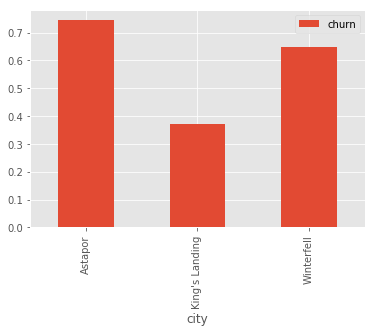

In [149]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

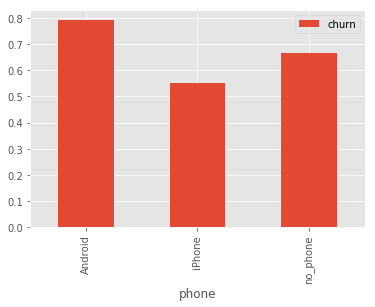

In [151]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

In [172]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

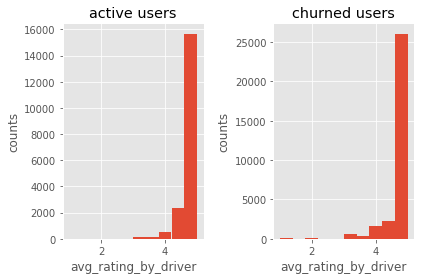

In [173]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

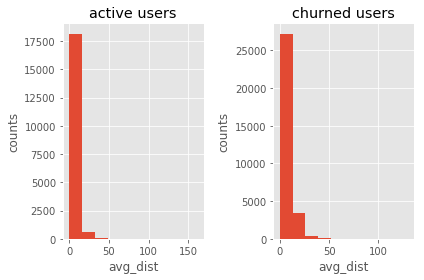

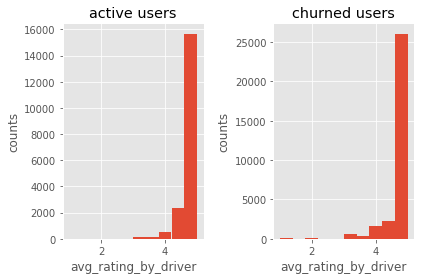

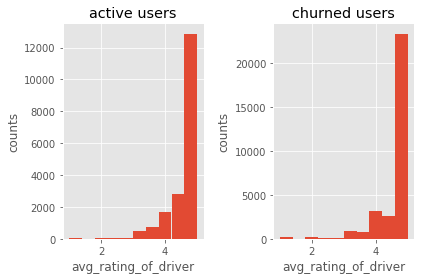

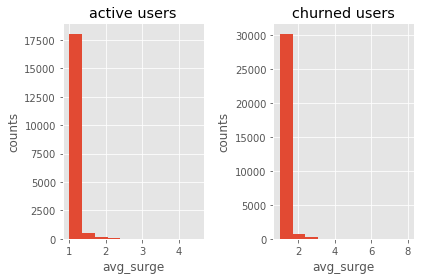

In [171]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']
for col in cols:
    hist_active_vs_churn(df, col_name=col)

# Save cleaned data to csv file

In [178]:
df.to_csv('cleaned_data.csv', index = False)